# Importing Libraries


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import matplotlib.dates as mdates
import yfinance as yf
import datetime


# Reading The Data

[*********************100%%**********************]  1 of 1 completed


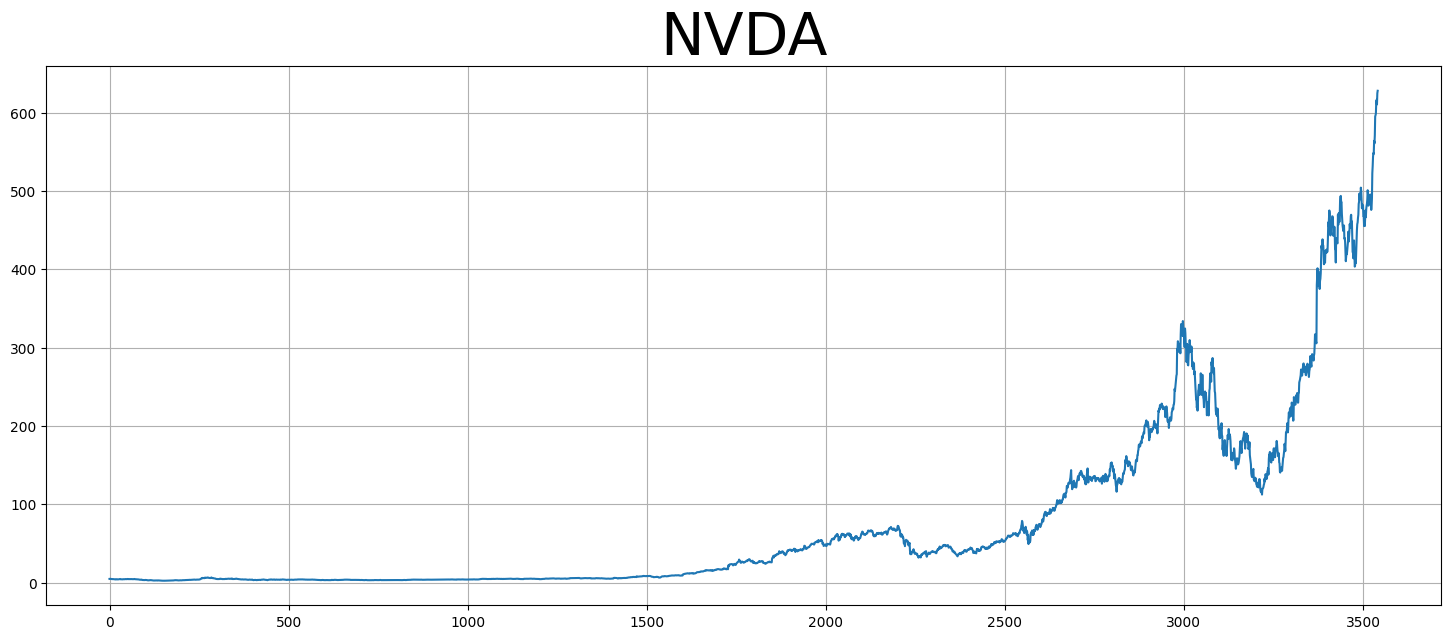

In [139]:
symb = "NVDA"
# Define today's date
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

df = yf.download(symb, start="2010-01-01", end=end_date, interval="1d")

plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# BB Indicator Visualizastion

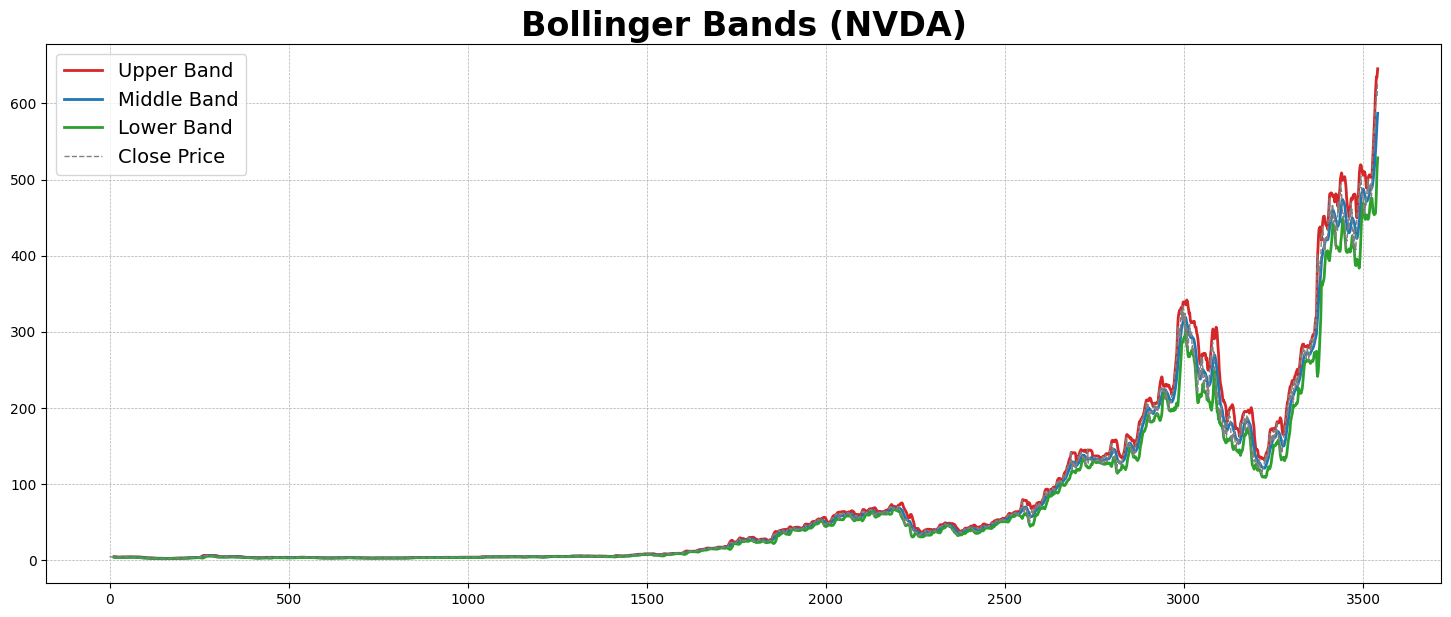

In [140]:
df['upperband'], df['middleband'], df['lowerband'] = ta.BBANDS(df['Close'], timeperiod=14, nbdevup=2, nbdevdn=2)

plt.figure(figsize=(18,7))
# Plotting the Bollinger Bands with enhanced style
plt.plot(df['upperband'], color='#d62728', label='Upper Band', linewidth=2)  # Darker red color
plt.plot(df['middleband'], color='#1f77b4', label='Middle Band', linewidth=2)  # Professional blue color
plt.plot(df['lowerband'], color='#2ca02c', label='Lower Band', linewidth=2)  # Darker green color

# Optionally, plot the Close price for reference
plt.plot(df['Close'], color='grey', label='Close Price', linewidth=1, linestyle='--')

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Bollinger Bands'+" ("+symb+")", fontsize=24, fontweight='bold')

# Improving grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

# Empty Arrays

In [141]:
buy=[]
sell=[]
profit=[]
Close_profit=[]
Stop_loss=[]
Close_order_buy=[]
Close_order_sell=[]
position_Buy=None
position_Sell=None
profit=0.4
lose=0.4

# Decision Making Process


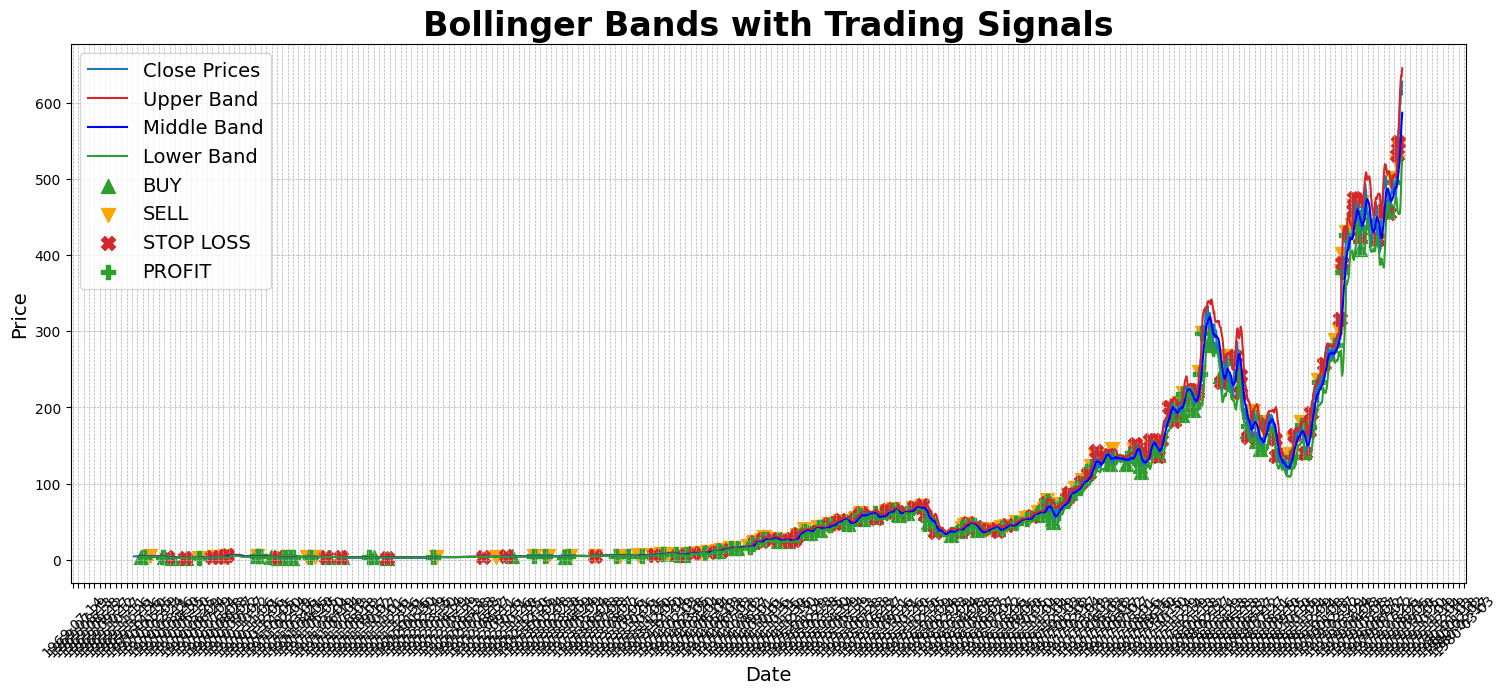

Profit = 99
Stop_loss = 92
PROFITIBLITY 51.832460732984295


In [142]:
for index in range(len(df)):
    # Check for a buy signal: Close price is below the lower Bollinger Band and no existing positions
    if df['Close'][index] < df['lowerband'][index] and position_Buy != "Buy" and position_Sell != "Sell":
        # Register a buy order at the Close price
        buy.append(df['Close'][index])
        # No sell order, so append NaN
        sell.append(float('nan'))
        # No profit or stop loss at the point of buying, so append NaN
        Close_profit.append(float('nan'))
        Stop_loss.append(float('nan'))
        # Record the Close price at which the buy order was initiated
        Close_order_buy.append(df['Close'][index])
        # Update the position status to 'Buy'
        position_Buy = "Buy"

    # Check for a sell signal: Close price is above the upper Bollinger Band and no existing positions
    elif df['Close'][index] > df['upperband'][index] and position_Sell != "Sell" and position_Buy != "Buy":
        # Register a sell order at the Close price
        sell.append(df['Close'][index])
        # No buy order, so append NaN
        buy.append(float('nan'))
        # No profit or stop loss at the point of selling, so append NaN
        Close_profit.append(float('nan'))
        Stop_loss.append(float('nan'))
        # Record the Close price at which the sell order was initiated
        Close_order_sell.append(df['Close'][index])
        # Update the position status to 'Sell'
        position_Sell = "Sell"

    # Manage an existing sell position
    elif position_Sell == "Sell":
        # Check for take profit condition in a sell position
        if Close_order_sell[-1] + lose <= df['Close'][index]:
            # No profit taken yet, append NaN
            Close_profit.append(float('nan'))
            # Record the price at which the stop loss is triggered
            Stop_loss.append(df['Close'][index])
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Sell = None
        # Check for stop loss condition in a sell position
        elif Close_order_sell[-1] - profit >= df['Close'][index]:
            # Record the price at which the profit is taken
            Close_profit.append(df['Close'][index])
            # No stop loss hit yet, append NaN
            Stop_loss.append(float('nan'))
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Sell = None
        else:
            # No action taken, append NaN for all
            Close_profit.append(float('nan'))
            Stop_loss.append(float('nan'))
            buy.append(float('nan'))
            sell.append(float('nan'))

    # Manage an existing buy position
    elif position_Buy == "Buy":
        # Check for take profit condition in a buy position
        if Close_order_buy[-1] + profit <= df['Close'][index]:
            # Record the price at which the profit is taken
            Close_profit.append(df['Close'][index])
            # No stop loss hit yet, append NaN
            Stop_loss.append(float('nan'))
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Buy = None
        # Check for stop loss condition in a buy position
        elif Close_order_buy[-1] - lose >= df['Close'][index]:
            # No profit taken yet, append NaN
            Close_profit.append(float('nan'))
            # Record the price at which the stop loss is triggered
            Stop_loss.append(df['Close'][index])
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Buy = None
        else:
            # No action taken, append NaN for all
            Close_profit.append(float('nan'))
            Stop_loss.append(float('nan'))
            buy.append(float('nan'))
            sell.append(float('nan'))

    # Default case when no condition is met
    else:
        # Append NaN for all as no action is taken
        buy.append(float('nan'))
        sell.append(float('nan'))
        Stop_loss.append(float('nan'))
        Close_profit.append(float('nan'))

           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss

df['Profit']=Close_profit
plt.figure(figsize=(18,7))


# Plotting the Bollinger Bands and Close price
plt.plot(df['Close'], label='Close Prices', color='#1f77b4')  # Professional blue color
plt.plot(df['upperband'], color='#d62728', label='Upper Band')  # Darker red
plt.plot(df['middleband'], color='b', label='Middle Band')  # Blue
plt.plot(df['lowerband'], color='#2ca02c', label='Lower Band')  # Darker green

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals
plt.scatter(df.index, df['buy'], marker='^', color='#2ca02c', s=100, label='BUY')  # Darker green
plt.scatter(df.index, df['sell'], marker='v', color='#FFA500', s=100, label='SELL')  # Darker red
plt.scatter(df.index, df['Stop_loss'], marker='X', color='#d62728', s=100, label='STOP LOSS')  # Same as SELL
plt.scatter(df.index, df['Profit'], marker='P', color='#2ca02c', s=100, label='PROFIT')  # Same as BUY

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Bollinger Bands with Trading Signals', fontsize=24, fontweight='bold')

# Improving grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Format the x-axis to display dates (if applicable)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
plt.xticks(rotation=45)


plt.show()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [143]:
# NSE
df = pd.read_csv('C:\\Users\\Daniel aghanya\\Pictures\\tiktok download\\Final_Year_Project-main\\Uni project\\NSE All Share Historical Data.csv')
df.dropna(inplace=True)
df = df.iloc[::-1].reset_index(drop=True)
# Converting 'Price', 'High', and 'Low' columns to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Price']  # Assuming 'Close' is same as 'Price'

df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,23/09/2015,30543.17,"30,426.78",30560.93,30425.31,466.94M,0.38%,30543.17
1,30/08/2016,27493.12,"27,368.41",27517.13,27364.18,230.13M,0.46%,27493.12
2,31/08/2016,27599.03,"27,493.12",27612.13,27487.20,262.61M,0.39%,27599.03
3,01/09/2016,28419.92,"27,599.03",28421.27,27599.03,229.23M,2.97%,28419.92
4,02/09/2016,27756.67,"28,419.92",28488.00,27744.76,309.45M,-2.33%,27756.67


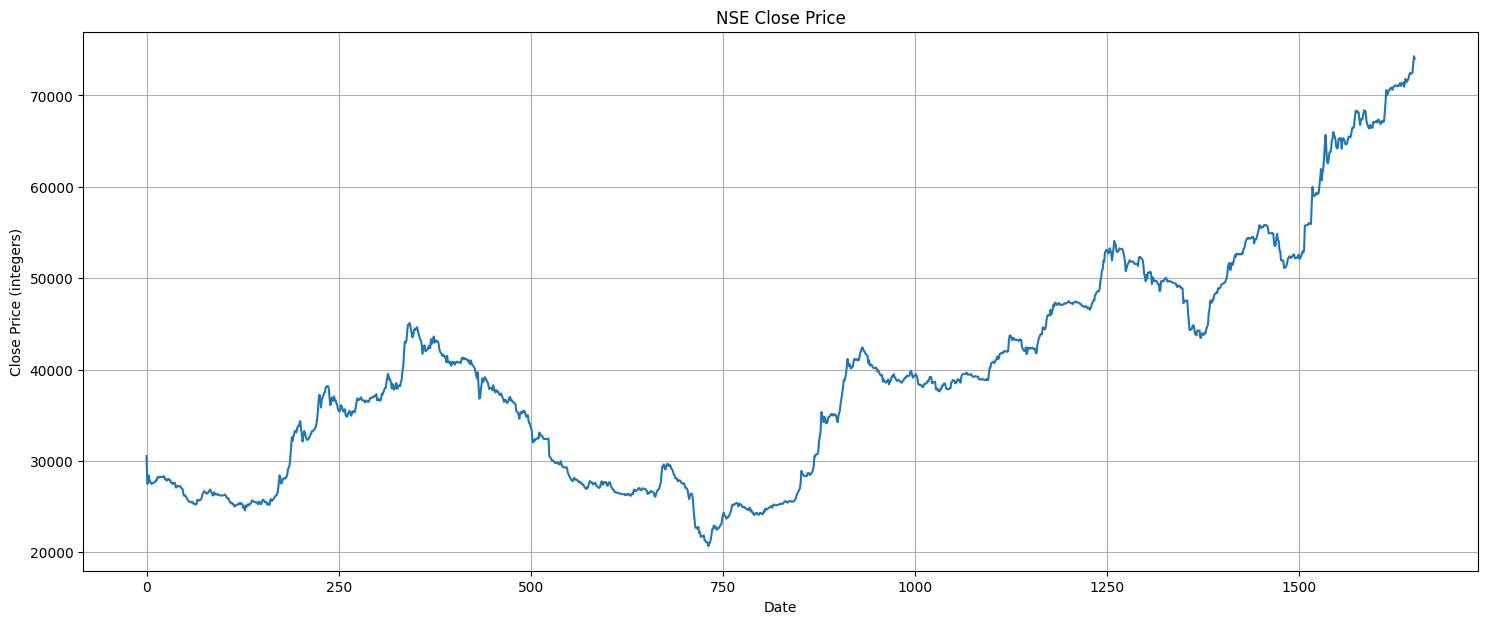

In [144]:
# Plot the Close price
plt.figure(figsize=(18,7))
plt.plot(df['Close'])
plt.title('NSE Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (integers)')
plt.grid()
plt.show()

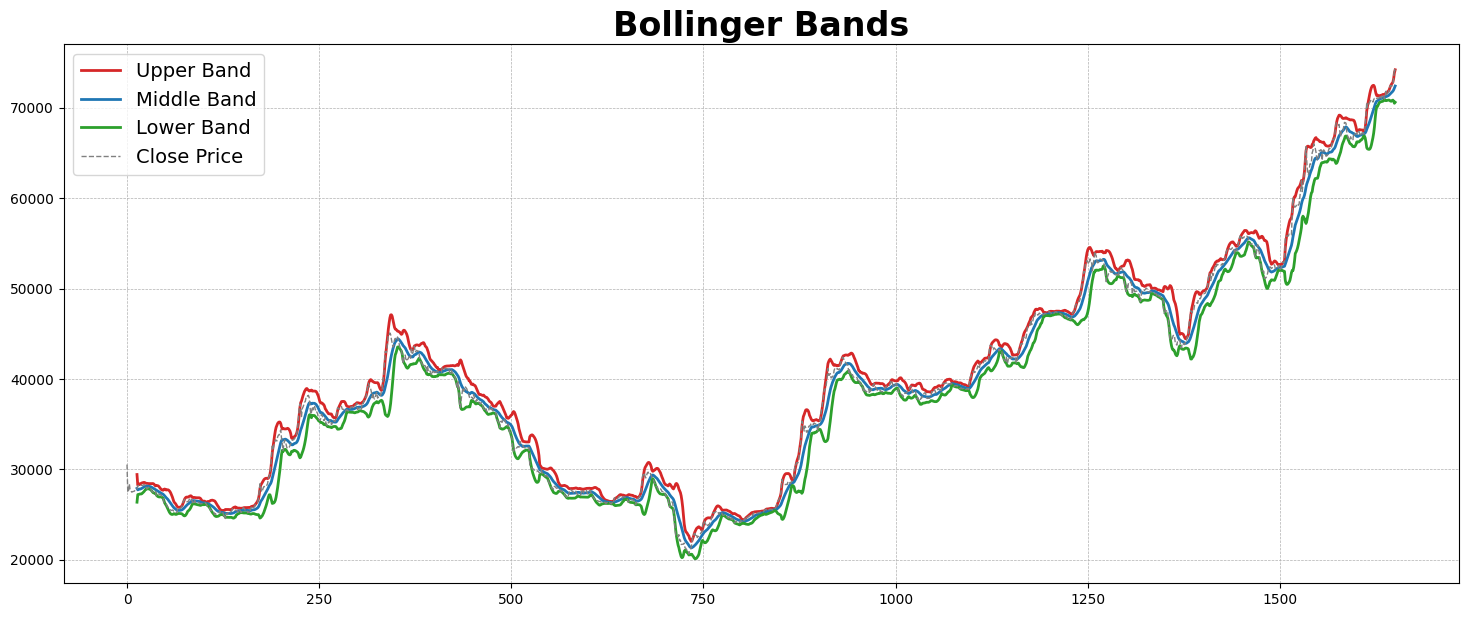

In [145]:
df['upperband'], df['middleband'], df['lowerband'] = ta.BBANDS(df['Close'], timeperiod=14, nbdevup=2, nbdevdn=2)
plt.figure(figsize=(18,7))
# Plotting the Bollinger Bands with enhanced style
plt.plot(df['upperband'], color='#d62728', label='Upper Band', linewidth=2)  # Darker red color
plt.plot(df['middleband'], color='#1f77b4', label='Middle Band', linewidth=2)  # Professional blue color
plt.plot(df['lowerband'], color='#2ca02c', label='Lower Band', linewidth=2)  # Darker green color

# Optionally, plot the Close price for reference
plt.plot(df['Close'], color='grey', label='Close Price', linewidth=1, linestyle='--')

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Bollinger Bands', fontsize=24, fontweight='bold')

# Improving grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [146]:
buy=[]
sell=[]
profit=[]
Close_profit=[]
Stop_loss=[]
Close_order_buy=[]
Close_order_sell=[]
position_Buy=None
position_Sell=None
profit=0.4
lose=0.4

In [147]:
for index in range(len(df)):
    # Check for a buy signal: Close price is below the lower Bollinger Band and no existing positions
    if df['Close'][index] < df['lowerband'][index] and position_Buy != "Buy" and position_Sell != "Sell":
        # Register a buy order at the Close price
        buy.append(df['Close'][index])
        # No sell order, so append NaN
        sell.append(float('nan'))
        # No profit or stop loss at the point of buying, so append NaN
        Close_profit.append(float('nan'))
        Stop_loss.append(float('nan'))
        # Record the Close price at which the buy order was initiated
        Close_order_buy.append(df['Close'][index])
        # Update the position status to 'Buy'
        position_Buy = "Buy"

    # Check for a sell signal: Close price is above the upper Bollinger Band and no existing positions
    elif df['Close'][index] > df['upperband'][index] and position_Sell != "Sell" and position_Buy != "Buy":
        # Register a sell order at the Close price
        sell.append(df['Close'][index])
        # No buy order, so append NaN
        buy.append(float('nan'))
        # No profit or stop loss at the point of selling, so append NaN
        Close_profit.append(float('nan'))
        Stop_loss.append(float('nan'))
        # Record the Close price at which the sell order was initiated
        Close_order_sell.append(df['Close'][index])
        # Update the position status to 'Sell'
        position_Sell = "Sell"

    # Manage an existing sell position
    elif position_Sell == "Sell":
        # Check for take profit condition in a sell position
        if Close_order_sell[-1] + lose <= df['Close'][index]:
            # No profit taken yet, append NaN
            Close_profit.append(float('nan'))
            # Record the price at which the stop loss is triggered
            Stop_loss.append(df['Close'][index])
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Sell = None
        # Check for stop loss condition in a sell position
        elif Close_order_sell[-1] - profit >= df['Close'][index]:
            # Record the price at which the profit is taken
            Close_profit.append(df['Close'][index])
            # No stop loss hit yet, append NaN
            Stop_loss.append(float('nan'))
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Sell = None
        else:
            # No action taken, append NaN for all
            Close_profit.append(float('nan'))
            Stop_loss.append(float('nan'))
            buy.append(float('nan'))
            sell.append(float('nan'))

    # Manage an existing buy position
    elif position_Buy == "Buy":
        # Check for take profit condition in a buy position
        if Close_order_buy[-1] + profit <= df['Close'][index]:
            # Record the price at which the profit is taken
            Close_profit.append(df['Close'][index])
            # No stop loss hit yet, append NaN
            Stop_loss.append(float('nan'))
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Buy = None
        # Check for stop loss condition in a buy position
        elif Close_order_buy[-1] - lose >= df['Close'][index]:
            # No profit taken yet, append NaN
            Close_profit.append(float('nan'))
            # Record the price at which the stop loss is triggered
            Stop_loss.append(df['Close'][index])
            # Clear buy and sell markers as the position is closed
            buy.append(float('nan'))
            sell.append(float('nan'))
            # Reset the position status
            position_Buy = None
        else:
            # No action taken, append NaN for all
            Close_profit.append(float('nan'))
            Stop_loss.append(float('nan'))
            buy.append(float('nan'))
            sell.append(float('nan'))

    # Default case when no condition is met
    else:
        # Append NaN for all as no action is taken
        buy.append(float('nan'))
        sell.append(float('nan'))
        Stop_loss.append(float('nan'))
        Close_profit.append(float('nan'))


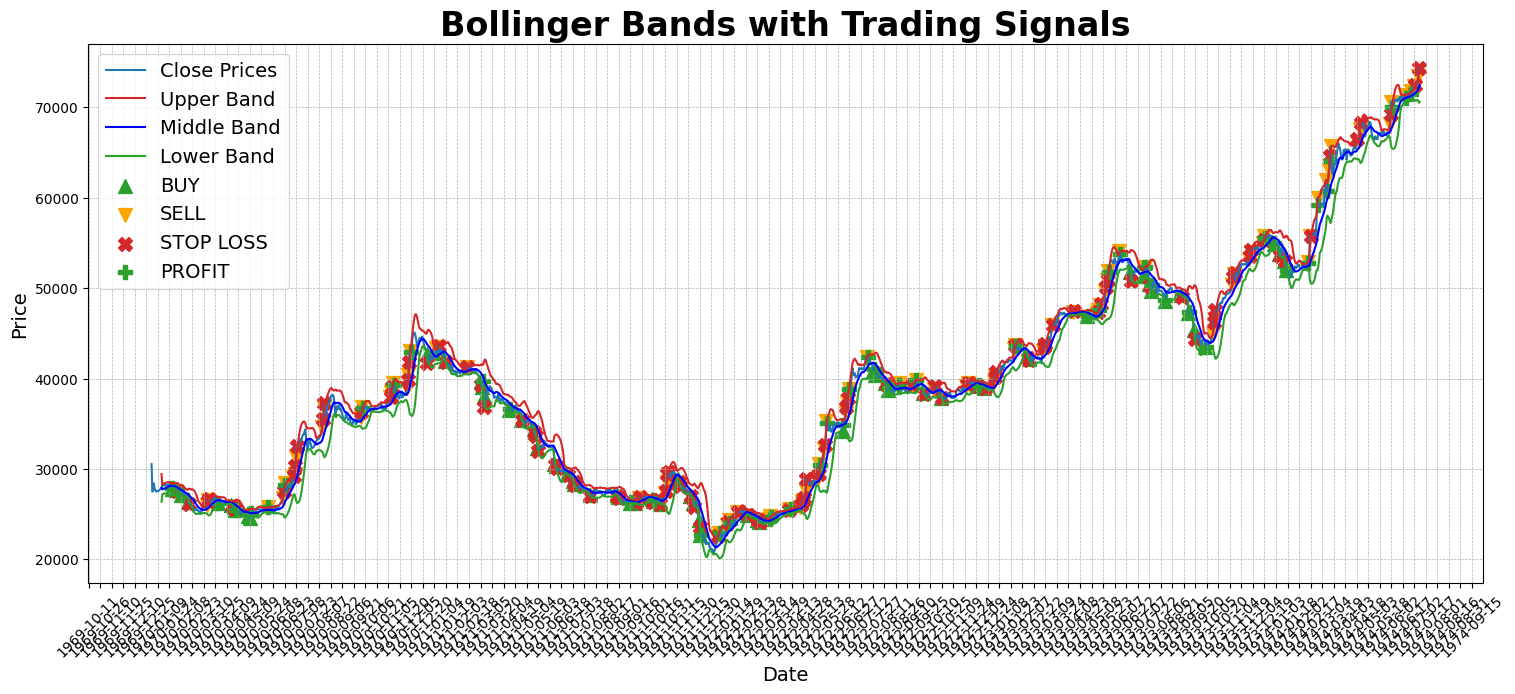

Profit = 54
Stop_loss = 104
PROFITIBLITY 34.177215189873415


In [148]:
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss

df['Profit']=Close_profit
plt.figure(figsize=(18,7))


# Plotting the Bollinger Bands and Close price
plt.plot(df['Close'], label='Close Prices', color='#1f77b4')  # Professional blue color
plt.plot(df['upperband'], color='#d62728', label='Upper Band')  # Darker red
plt.plot(df['middleband'], color='b', label='Middle Band')  # Blue
plt.plot(df['lowerband'], color='#2ca02c', label='Lower Band')  # Darker green

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals
plt.scatter(df.index, df['buy'], marker='^', color='#2ca02c', s=100, label='BUY')  # Darker green
plt.scatter(df.index, df['sell'], marker='v', color='#FFA500', s=100, label='SELL')  # Darker red
plt.scatter(df.index, df['Stop_loss'], marker='X', color='#d62728', s=100, label='STOP LOSS')  # Same as SELL
plt.scatter(df.index, df['Profit'], marker='P', color='#2ca02c', s=100, label='PROFIT')  # Same as BUY

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Bollinger Bands with Trading Signals', fontsize=24, fontweight='bold')

# Improving grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Format the x-axis to display dates (if applicable)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
plt.xticks(rotation=45)


plt.show()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")